# Automated Complaint Triage System: Prioritizing Forum Feedback with NLP and Machine Learning

## Project Summary
The "Automated Complaint Triage System" is designed to analyze and prioritize customer complaints posted on a company forum. Using a predefined dataset of complaints with details such as customer ID, phone number, date posted, location, and email, the system employs natural language processing (NLP) and machine learning techniques to categorize issues into High, Medium, and Low severity levels. Initially, TF-IDF vectorization and K-means clustering assign tentative severity labels based on complaint text, which are then refined by a Naive Bayes classifier. The system evaluates its performance with classification metrics and a confusion matrix, enabling accurate predictions for new complaints. By providing prioritized action items with customer details and confidence scores, it streamlines the resolution process for support teams, enhancing efficiency in addressing customer concerns.

In [3]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Predefined Complaint Dataset
data = {
    "customer_id": [
        "CUST12345", "CUST23456", "CUST34567", "CUST45678", "CUST56789",
        "CUST67890", "CUST78901", "CUST89012", "CUST90123", "CUST01234",
        "CUST11223", "CUST22334", "CUST33445", "CUST44556", "CUST55667",
        "CUST66778", "CUST77889", "CUST88990", "CUST99001", "CUST10112"
    ],
    "phone_number": [
        "555-123-4567", "555-234-5678", "555-345-6789", "555-456-7890", "555-567-8901",
        "555-678-9012", "555-789-0123", "555-890-1234", "555-901-2345", "555-012-3456",
        "555-112-2345", "555-223-3456", "555-334-4567", "555-445-5678", "555-556-6789",
        "555-667-7890", "555-778-8901", "555-889-9012", "555-990-0123", "555-101-1234"
    ],
    "date_posted": [
        "2025-03-01 09:15:23", "2025-03-02 14:30:45", "2025-03-03 10:20:10", "2025-03-04 16:45:00",
        "2025-03-05 11:10:30", "2025-03-06 13:25:15", "2025-03-07 08:50:40", "2025-03-08 15:35:20",
        "2025-03-09 12:05:55", "2025-03-10 17:15:10", "2025-03-11 09:40:25", "2025-03-12 14:20:35",
        "2025-03-13 10:55:50", "2025-03-14 16:30:15", "2025-03-15 11:45:40", "2025-03-16 13:10:20",
        "2025-03-17 08:25:05", "2025-03-18 15:50:30", "2025-03-19 12:35:45", "2025-03-20 17:00:10"
    ],
    "location": [
        "New York, NY", "Los Angeles, CA", "Chicago, IL", "Houston, TX", "Phoenix, AZ",
        "Philadelphia, PA", "San Antonio, TX", "San Diego, CA", "Dallas, TX", "San Jose, CA",
        "Austin, TX", "Jacksonville, FL", "Columbus, OH", "Seattle, WA", "Denver, CO",
        "Boston, MA", "Portland, OR", "Las Vegas, NV", "Atlanta, GA", "Miami, FL"
    ],
    "email_id": [
        "john.doe@email.com", "jane.smith@email.com", "bob.jones@email.com", "alice.brown@email.com",
        "mike.wilson@email.com", "sarah.davis@email.com", "tom.jackson@email.com", "emma.white@email.com",
        "david.lee@email.com", "lisa.martin@email.com", "peter.clark@email.com", "mary.hall@email.com",
        "james.taylor@email.com", "susan.moore@email.com", "chris.evans@email.com", "kate.roberts@email.com",
        "steve.adams@email.com", "laura.miller@email.com", "paul.walker@email.com", "nancy.green@email.com"
    ],
    "complaint": [
        "Internet down for 3 days, urgent fix needed, losing business!",
        "Billing error this month, charged twice, please correct it.",
        "Connection drops occasionally during evening hours, annoying.",
        "Account compromised, unauthorized access, emergency!",
        "How do I update my payment details? Simple question.",
        "Support team response time is too slow, frustrating experience.",
        "Service cut off suddenly with no warning, unacceptable!",
        "Minor overcharge noticed in last statement, needs review.",
        "Getting promotional texts despite opting out, irritating.",
        "App keeps freezing during transactions, basic issue.",
        "Website down for hours, critical problem affecting work!",
        "Slight lag in video streaming, not urgent but noticeable.",
        "Payment system crashed mid-transaction, urgent resolution needed!",
        "Interface could be more user-friendly, minor suggestion.",
        "Data breach detected, immediate action required, serious issue!",
        "Delivery delayed by a week, very disappointing service.",
        "Login issues persist despite multiple attempts, urgent help!",
        "Minor glitch in mobile app, occasional crashes.",
        "Customer service unreachable for days, terrible experience!",
        "Incorrect item shipped, need replacement soon."
    ]
}


In [5]:
# Create DataFrame
df = pd.DataFrame(data)
print(df)

   customer_id  phone_number          date_posted          location  \
0    CUST12345  555-123-4567  2025-03-01 09:15:23      New York, NY   
1    CUST23456  555-234-5678  2025-03-02 14:30:45   Los Angeles, CA   
2    CUST34567  555-345-6789  2025-03-03 10:20:10       Chicago, IL   
3    CUST45678  555-456-7890  2025-03-04 16:45:00       Houston, TX   
4    CUST56789  555-567-8901  2025-03-05 11:10:30       Phoenix, AZ   
5    CUST67890  555-678-9012  2025-03-06 13:25:15  Philadelphia, PA   
6    CUST78901  555-789-0123  2025-03-07 08:50:40   San Antonio, TX   
7    CUST89012  555-890-1234  2025-03-08 15:35:20     San Diego, CA   
8    CUST90123  555-901-2345  2025-03-09 12:05:55        Dallas, TX   
9    CUST01234  555-012-3456  2025-03-10 17:15:10      San Jose, CA   
10   CUST11223  555-112-2345  2025-03-11 09:40:25        Austin, TX   
11   CUST22334  555-223-3456  2025-03-12 14:20:35  Jacksonville, FL   
12   CUST33445  555-334-4567  2025-03-13 10:55:50      Columbus, OH   
13   C

In [6]:
df.loc[0]

customer_id                                             CUST12345
phone_number                                         555-123-4567
date_posted                                   2025-03-01 09:15:23
location                                             New York, NY
email_id                                       john.doe@email.com
complaint       Internet down for 3 days, urgent fix needed, l...
Name: 0, dtype: object

In [7]:
df.dtypes

customer_id     object
phone_number    object
date_posted     object
location        object
email_id        object
complaint       object
dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Initial Clustering Function
def initial_clustering(complaints):
    tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
    X_tfidf = tfidf.fit_transform(complaints)
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_tfidf)
    
    high_keywords = {'urgent', 'emergency', 'critical', 'serious', 'unacceptable'}
    low_keywords = {'minor', 'simple', 'slight', 'suggestion'}
    
    def estimate_severity(text, cluster):
        text_lower = text.lower()
        if any(kw in text_lower for kw in high_keywords):
            return 2  # High
        elif any(kw in text_lower for kw in low_keywords):
            return 0  # Low
        elif cluster == clusters.mean():
            return 1  # Medium
        return cluster

    # Assign initial severity labels (0=Low, 1=Medium, 2=High) using complaint text and clusters
    initial_labels = [estimate_severity(comp, cluster) for comp, cluster in zip(complaints, clusters)]

    # Return TF-IDF matrix, vectorizer, and labels for training and prediction
    return X_tfidf, tfidf, initial_labels




In [10]:
from sklearn.model_selection import train_test_split

# Train Classifier Function
def train_classifier(X_tfidf, initial_labels):
    X_train,X_test,y_train,y_test = train_test_split(X_tfidf, initial_labels, test_size=0.2, random_state=42)
    
    # naive bayes classifier
    nb_classifier = MultinomialNB(alpha=0.1)
    nb_classifier.fit(X_train,y_train)
    y_pred = nb_classifier.predict(X_test)
    return nb_classifier, X_test, y_test, y_pred


In [11]:
# Main Analysis
print("Analyzing forum complaints...\n")

# Initial clustering
X_tfidf, tfidf, initial_labels = initial_clustering(df["complaint"])

# Add initial labels
label_map = {0: "Low", 1: "Medium", 2: "High"}
df["priority"] = [label_map[label] for label in initial_labels]

# Train classifier
classifier, X_test, y_test, y_pred = train_classifier(X_tfidf, initial_labels)

# Display sample complaints
print("Sample Complaints from Forum:")
for i in range(5):
    print(f"\nComplaint {i+1}:")
    print(f"Customer ID: {df['customer_id'].iloc[i]}")
    print(f"Phone: {df['phone_number'].iloc[i]}")
    print(f"Date Posted: {df['date_posted'].iloc[i]}")
    print(f"Location: {df['location'].iloc[i]}")
    print(f"Email: {df['email_id'].iloc[i]}")
    print(f"Complaint: {df['complaint'].iloc[i][:100]}...")
    print(f"Assigned Priority: {df['priority'].iloc[i]}")

Analyzing forum complaints...

Sample Complaints from Forum:

Complaint 1:
Customer ID: CUST12345
Phone: 555-123-4567
Date Posted: 2025-03-01 09:15:23
Location: New York, NY
Email: john.doe@email.com
Complaint: Internet down for 3 days, urgent fix needed, losing business!...
Assigned Priority: High

Complaint 2:
Customer ID: CUST23456
Phone: 555-234-5678
Date Posted: 2025-03-02 14:30:45
Location: Los Angeles, CA
Email: jane.smith@email.com
Complaint: Billing error this month, charged twice, please correct it....
Assigned Priority: Low

Complaint 3:
Customer ID: CUST34567
Phone: 555-345-6789
Date Posted: 2025-03-03 10:20:10
Location: Chicago, IL
Email: bob.jones@email.com
Complaint: Connection drops occasionally during evening hours, annoying....
Assigned Priority: High

Complaint 4:
Customer ID: CUST45678
Phone: 555-456-7890
Date Posted: 2025-03-04 16:45:00
Location: Houston, TX
Email: alice.brown@email.com
Complaint: Account compromised, unauthorized access, emergency!...
Assigned Pri


Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         3
      Medium       0.00      0.00      0.00         0
        High       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         4
   macro avg       0.67      0.67      0.67         4
weighted avg       1.00      1.00      1.00         4



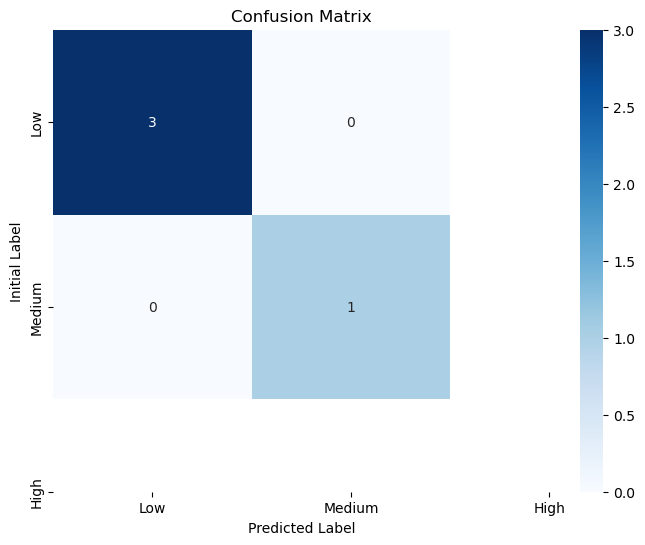

In [12]:
# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Low", "Medium", "High"], zero_division=0))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title('Confusion Matrix')
plt.ylabel('Initial Label')
plt.xlabel('Predicted Label')
plt.show()

In [13]:
# Prediction Function and New Complaints
def predict_priority(complaint):
    X_new = tfidf.transform([complaint])
    priority_class = classifier.predict(X_new)[0]
    probability = max(classifier.predict_proba(X_new)[0]) * 100
    return label_map[priority_class], probability

# Predefined new complaints
new_complaints = [
    {"customer_id": "CUST54321", "phone_number": "555-123-4567", 
     "date_posted": "2025-03-25 10:15:23", "location": "Austin, TX", 
     "email_id": "john.doe@email.com", "complaint": "Complete system failure, urgent help needed!"},
    {"customer_id": "CUST67890", "phone_number": "555-987-6543", 
     "date_posted": "2025-03-25 11:30:45", "location": "Seattle, WA", 
     "email_id": "jane.smith@email.com", "complaint": "Minor delay in response time today"},
    {"customer_id": "CUST11223", "phone_number": "555-555-5555", 
     "date_posted": "2025-03-25 14:20:10", "location": "Miami, FL", 
     "email_id": "bob.jones@email.com", "complaint": "Billing issue needs checking"}
]

print("\nResolution Team Action Items:")
for i, post in enumerate(new_complaints, 1):
    priority, confidence = predict_priority(post["complaint"])
    print(f"\nAction Item {i}:")
    print(f"Customer ID: {post['customer_id']}")
    print(f"Phone: {post['phone_number']}")
    print(f"Date Posted: {post['date_posted']}")
    print(f"Location: {post['location']}")
    print(f"Email: {post['email_id']}")
    print(f"Complaint: {post['complaint']}")
    print(f"Priority: {priority} (Confidence: {confidence:.2f}%)")
    print("Status: Assigned to resolution team")


Resolution Team Action Items:

Action Item 1:
Customer ID: CUST54321
Phone: 555-123-4567
Date Posted: 2025-03-25 10:15:23
Location: Austin, TX
Email: john.doe@email.com
Complaint: Complete system failure, urgent help needed!
Priority: High (Confidence: 94.22%)
Status: Assigned to resolution team

Action Item 2:
Customer ID: CUST67890
Phone: 555-987-6543
Date Posted: 2025-03-25 11:30:45
Location: Seattle, WA
Email: jane.smith@email.com
Complaint: Minor delay in response time today
Priority: Low (Confidence: 94.74%)
Status: Assigned to resolution team

Action Item 3:
Customer ID: CUST11223
Phone: 555-555-5555
Date Posted: 2025-03-25 14:20:10
Location: Miami, FL
Email: bob.jones@email.com
Complaint: Billing issue needs checking
Priority: Low (Confidence: 71.29%)
Status: Assigned to resolution team
